# **Melanoma Cancer Detection using CNN**
<img src="cancer_image.jpg" alt="Skin cancer detection" width="500"/>

This notebook builds a deep learning model to classify skin cancer images as **benign** or **melanoma** using Convolutional Neural Networks (CNN). It includes data preprocessing, model training, evaluation, and deployment preparation.

#### **Importing Libraries**

In [ ]:
# Core Python & Utilities
import os
import random
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for evaluation & data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.utils import class_weight

# Keras/TensorFlow: Data, Layers, Training
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, GlobalMaxPooling2D,
    Dense, Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

#### **Extracting zip data**

In [110]:
# Extract ZIP Dataset
zip_path = r'D:\Daiict_Py\FoML and DL\CNN\Melanoma Cancer Detector\melanoma_data.zip'
extract_path = 'skin-set'
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("ZIP file extracted successfully.")
else:
    print("ZIP file already extracted.")

ZIP file already extracted.


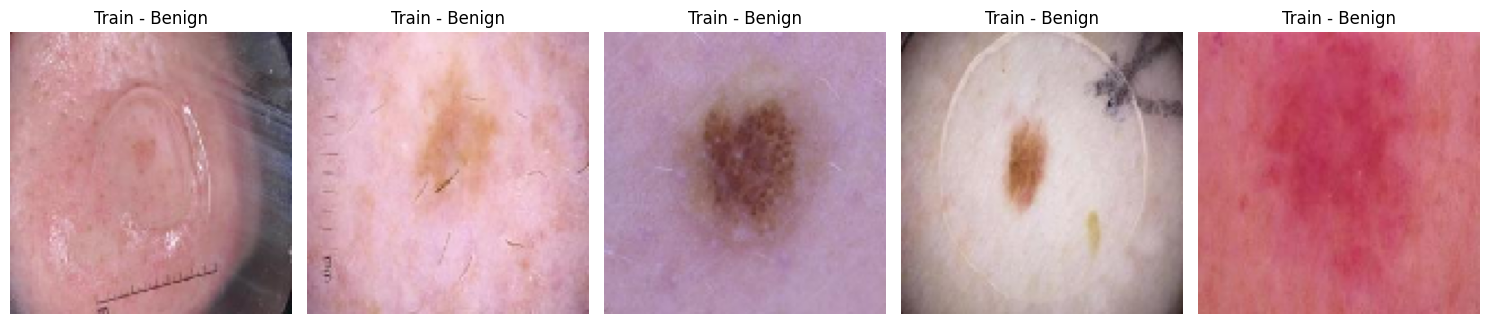

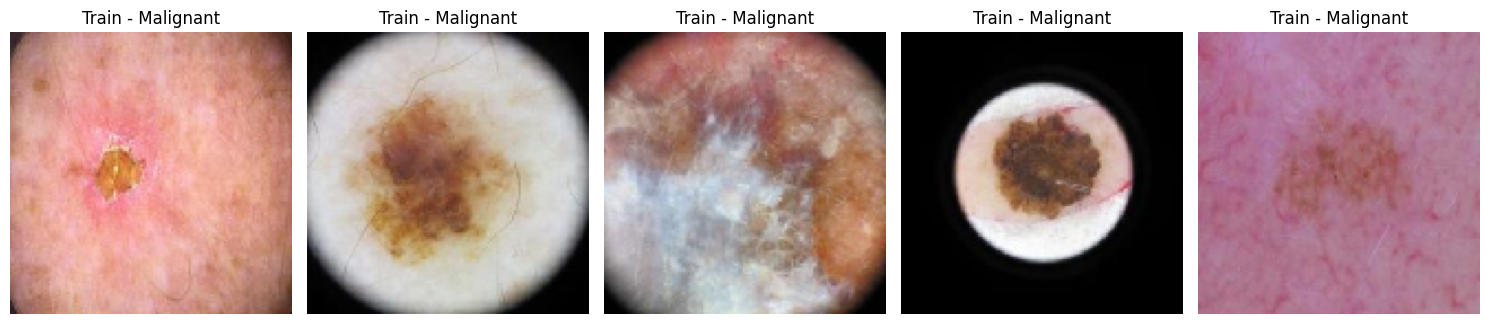

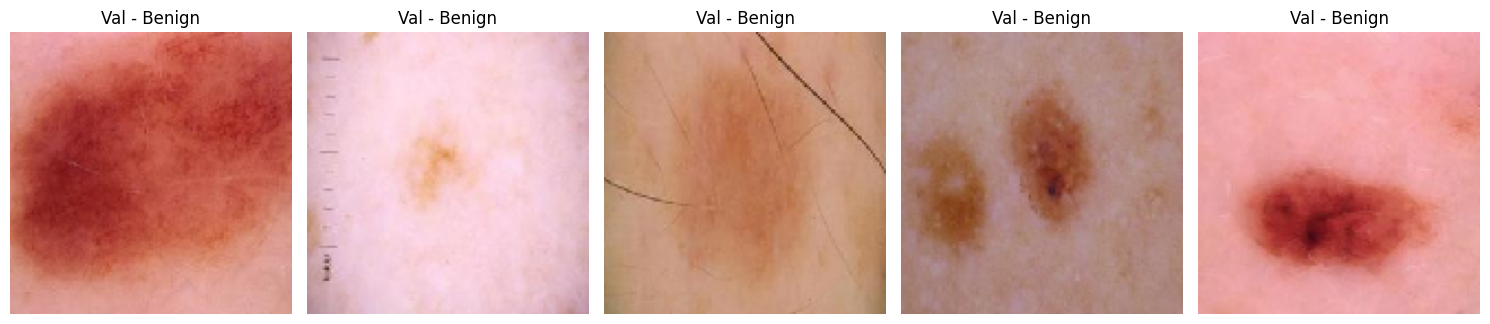

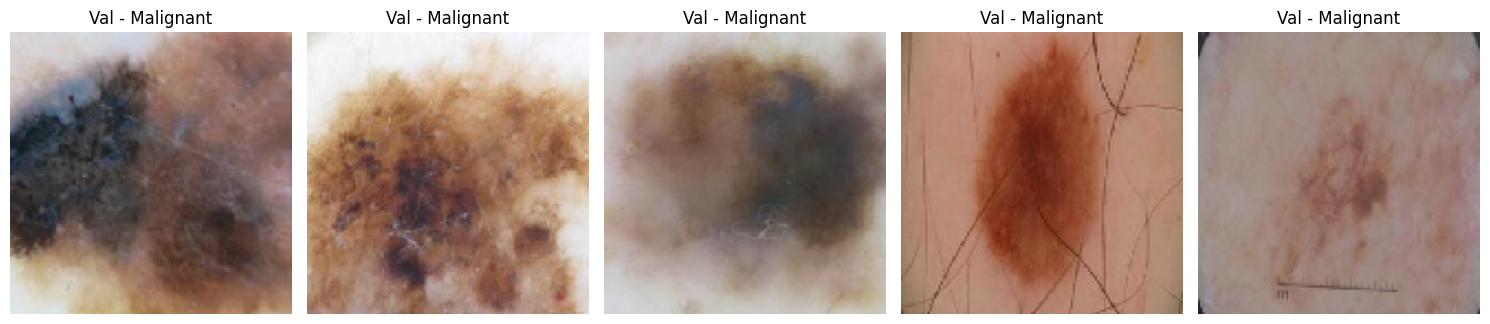

Found 7603 images belonging to 2 classes.
Found 4276 images belonging to 2 classes.


In [ ]:
# Parameters
base_dir = './skin-split'
train_split_dir = os.path.join(base_dir, 'train')
val_split_dir = os.path.join(base_dir, 'val')
classes = ['Benign', 'Malignant']
splits = ['train', 'val']
img_size = (128, 128)

# Function to plot images
def plot_images_from_split(base_path, split_type, class_name, num_images=5, img_size=(128, 128)):
    class_path = os.path.join(base_path, split_type, class_name)
    all_images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(all_images) == 0:
        print(f"No images found in {class_path}")
        return
    
    images = random.sample(all_images, min(num_images, len(all_images)))

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=img_size)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{split_type.capitalize()} - {class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize Images
for split in splits:
    for cls in classes:
        plot_images_from_split(base_dir, split, cls)

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_split_dir,
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    shuffle=True
)
val_generator = val_datagen.flow_from_directory(
    val_split_dir,
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


#### **Model Building**

c:\Users\Vivek Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - AUC: 0.7770 - Precision: 0.6757 - Recall: 0.7178 - accuracy: 0.6952 - loss: 0.5710 - val_AUC: 0.8924 - val_Precision: 0.7129 - val_Recall: 0.9170 - val_accuracy: 0.7872 - val_loss: 0.4889
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - AUC: 0.8777 - Precision: 0.7795 - Recall: 0.7920 - accuracy: 0.7984 - loss: 0.4474 - val_AUC: 0.9031 - val_Precision: 0.7827 - val_Recall: 0.8484 - val_accuracy: 0.8178 - val_loss: 0.4063
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - AUC: 0.8943 - Precision: 0.7893 - Recall: 0.8042 - accuracy: 0.8081 - loss: 0.4188 - val_AUC: 0.9067 - val_Precision: 0.8520 - val_Recall: 0.7242 - val_accuracy: 0.8110 - val_loss: 0.4097
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - AUC: 0.8899 - Precision: 0.7771 - Recall: 0.8181 - accuracy: 0.8010 - loss: 0.4246 - val_AUC: 0.9168 - val_Precision: 0.8071 - val_Recall: 0.8360 - val_accuracy: 0.8288 - val_loss: 0.3753
Epoch 5/10
476/476 ━━━━━

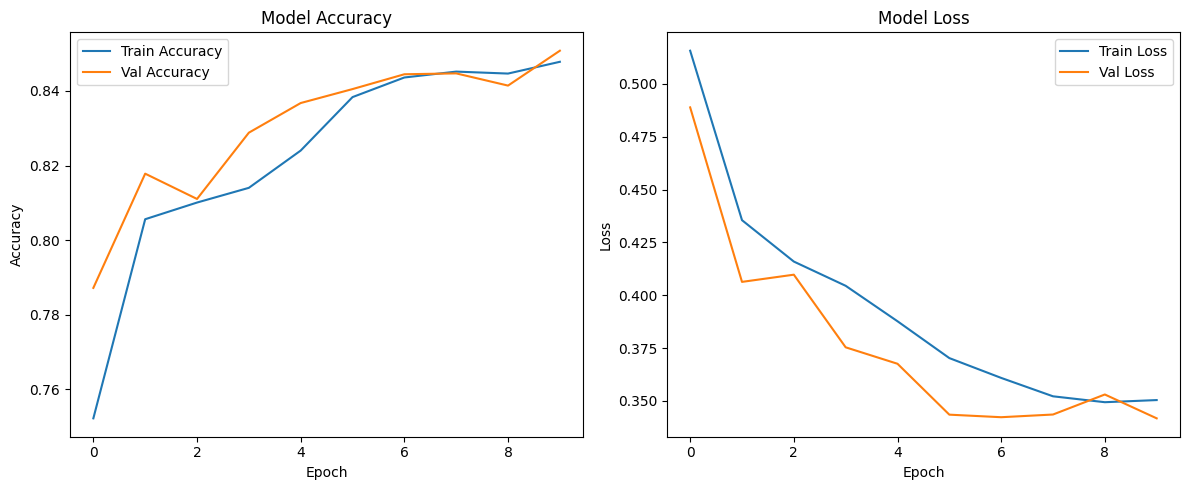

In [ ]:
# Build - CNN Model
model = Sequential()

# Block 1
model.add(Conv2D(52, 3, activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(2, 2))

# Block 2
model.add(Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(2, 2))

# Classification block
model.add(GlobalMaxPooling2D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Compute Class Weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights
)

# Plot Training Curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### **Evaluation on Validation set**

268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step

Validation Report (Threshold=0.5):
              precision    recall  f1-score   support

      Benign       0.91      0.80      0.85      2264
   Malignant       0.80      0.91      0.85      2012

    accuracy                           0.85      4276
   macro avg       0.85      0.85      0.85      4276
weighted avg       0.86      0.85      0.85      4276

Validation AUC: 0.9366677584668667
Validation Accuracy: 0.8507951356407858
Validation Precision: 0.800524934383202
Validation Recall: 0.9095427435387674


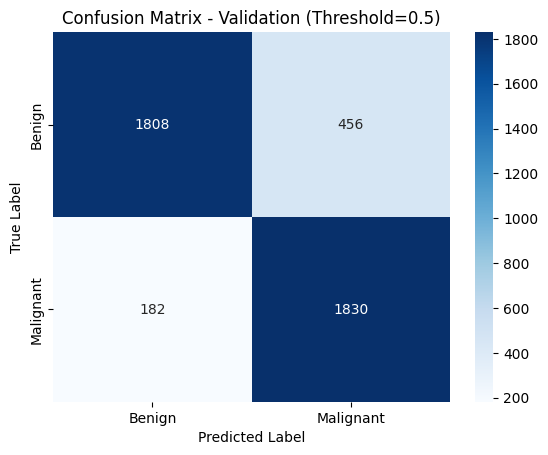

In [125]:
# Evaluate Validation Set with Adjusted Threshold
val_true = val_generator.classes
val_pred_proba = model.predict(val_generator)
threshold = 0.5
val_pred = (val_pred_proba > threshold).astype(int).flatten()

print(f"\nValidation Report (Threshold={threshold}):")
print(classification_report(val_true, val_pred, target_names=['Benign', 'Malignant']))
print("Validation AUC:", roc_auc_score(val_true, val_pred_proba))
print("Validation Accuracy:", accuracy_score(val_true, val_pred))
print("Validation Precision:", precision_score(val_true, val_pred))
print("Validation Recall:", recall_score(val_true, val_pred))

# Confusion matrix with class labels
cm_val = confusion_matrix(val_true, val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title(f"Confusion Matrix - Validation (Threshold={threshold})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Evaluation on Test set**

Found 2000 images belonging to 2 classes.
  27/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

c:\Users\Vivek Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

Test Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       0.86      0.90      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.87      2000
weighted avg       0.88      0.88      0.87      2000

Test AUC: 0.9402919999999999
Test Accuracy: 0.875
Test Precision: 0.8564638783269962
Test Recall: 0.901


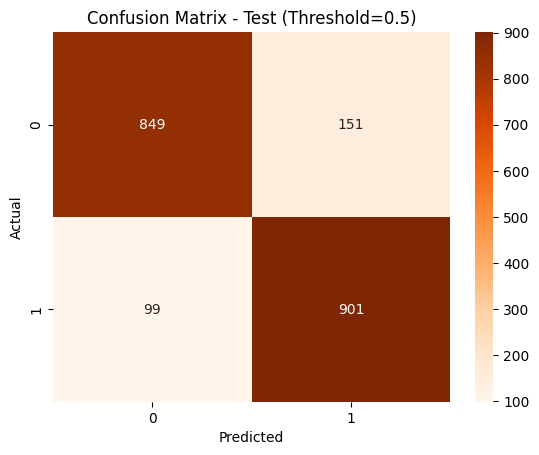

In [124]:
# Test Data Generator and Evaluation
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory = 'skin-set/test',
    target_size=img_size,
    batch_size=2,
    class_mode='binary',
    shuffle=False
)
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator)
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int).flatten()

print(f"\nTest Report (Threshold={threshold}):")
print(classification_report(y_true, y_pred))
print("Test AUC:", roc_auc_score(y_true, y_pred_proba))
print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Test Precision:", precision_score(y_true, y_pred))
print("Test Recall:", recall_score(y_true, y_pred))

cm_test = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix - Test (Threshold={threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### **Roc-Auc**

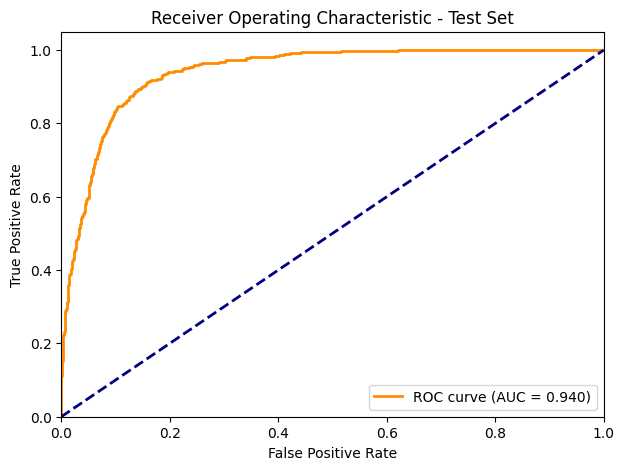

In [126]:
# ROC Curve for Test Set
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()

In [128]:
# Save Model
model.save("melanoma_model.h5")
print("✅ Model saved as melanoma_model.h5")

✅ Model saved as melanoma_model.h5


----

### **Build a Simple Web Interface**

In [16]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import gradio as gr

# Load your trained model
model = load_model("melanoma_model.h5")
img_size = (128, 128)

# Prediction function
def predict(img):
    # Resize and normalize
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    prediction = model.predict(img)[0][0]
    confidence = prediction * 100

    if prediction >= 0.5:
        label = "Melanoma (Cancer)"
        confidence_display = confidence
    else:
        label = "Benign (Non-Cancer)"
        confidence_display = 100 - confidence

    return f"🧠 Prediction: {label}\n📊 Detection Likelihood: {confidence_display:.2f}%"

# Gradio interface
gr.Interface(
    fn=predict,
    inputs=gr.Image(type="numpy", label="Upload Skin Image"),
    outputs=gr.Textbox(label="Prediction Result"),
    title="Melanoma Cancer Detection",
    description="Upload a skin lesion image. The model predicts if it is Melanoma (cancer) or Benign (non-cancer), with confidence."
).launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [2]:
from tensorflow.keras.models import load_model
from scikeras.wrappers import KerasClassifier
import pickle

# Load pre-trained model
model = load_model('final_melanoma_model.h5')

# Wrap it (dummy wrapper example)
def make_model():
    return model

wrapped_model = KerasClassifier(model=make_model)

# Save the wrapped model
with open('model.pkl', 'wb') as f:
    pickle.dump(wrapped_model, f)